In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [28]:
house_prices = pd.read_csv("House_Price.csv")
kc_data = pd.read_csv("KC_BL_DATASET.csv")

In [51]:
print(kc_data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'Main_Genre', 'Genre_2', 'Genre_3', 'imdb_rating', 'length',
       'rank_in_year', 'rating', 'studio', 'title', 'worldwide_gross', 'year'],
      dtype='object')


In [32]:
print("House Prices Dataset Info:")
print(house_prices.info())

House Prices Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-nu

In [33]:
print("\nKing County Dataset Info:")
print(kc_data.info())


King County Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               437 non-null    int64  
 1   date             437 non-null    object 
 2   price            437 non-null    int64  
 3   bedrooms         437 non-null    int64  
 4   bathrooms        437 non-null    float64
 5   sqft_living      437 non-null    int64  
 6   sqft_lot         437 non-null    int64  
 7   sqft_above       437 non-null    int64  
 8   sqft_basement    437 non-null    int64  
 9   yr_built         437 non-null    int64  
 10  yr_renovated     437 non-null    int64  
 11  Main_Genre       437 non-null    object 
 12  Genre_2          408 non-null    object 
 13  Genre_3          296 non-null    object 
 14  imdb_rating      437 non-null    float64
 15  length           437 non-null    int64  
 16  rank_in_year     437 non-null    in

In [35]:
print(house_prices.isnull().sum())

price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       8
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64


In [36]:
print(kc_data.isnull().sum())

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
Main_Genre           0
Genre_2             29
Genre_3            141
imdb_rating          0
length               0
rank_in_year         0
rating               0
studio               0
title                0
worldwide_gross      0
year                 0
dtype: int64


In [37]:
house_prices.fillna(house_prices.median(numeric_only=True), inplace=True)
kc_data.fillna(kc_data.median(numeric_only=True), inplace=True)

In [38]:
house_prices.drop_duplicates(inplace=True)
kc_data.drop_duplicates(inplace=True)

In [40]:
kc_data['date'] = pd.to_datetime(kc_data['date'], errors='coerce')

In [41]:
print(house_prices.describe())

            price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    3.613524   41.136779    0.554695    6.284634   68.574901   
std      9.182176    8.601545    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006320   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.082045   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.256510   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    3.677083   48.100000    0.624000    6.623500   94.075000   
max     50.000000   88.976200   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.1085

In [42]:
print(kc_data.describe())

                 id                           date         price    bedrooms  \
count  4.370000e+02                            437  4.370000e+02  437.000000   
mean   4.695092e+09  2014-11-06 01:45:26.773455360  5.233471e+05    3.423341   
min    4.610035e+07            2014-05-02 00:00:00  1.000000e+05    0.000000   
25%    2.220069e+09            2014-07-20 00:00:00  3.050000e+05    3.000000   
50%    4.038701e+09            2014-10-25 00:00:00  4.350000e+05    3.000000   
75%    7.518503e+09            2015-02-24 00:00:00  6.300000e+05    4.000000   
max    9.834201e+09            2015-05-13 00:00:00  2.900000e+06    8.000000   
std    2.834411e+09                            NaN  3.439340e+05    0.951438   

        bathrooms  sqft_living      sqft_lot   sqft_above  sqft_basement  \
count  437.000000   437.000000  4.370000e+02   437.000000     437.000000   
mean     2.132723  2092.622426  2.097368e+04  1806.501144     286.121281   
min      0.000000   660.000000  8.950000e+02   660.

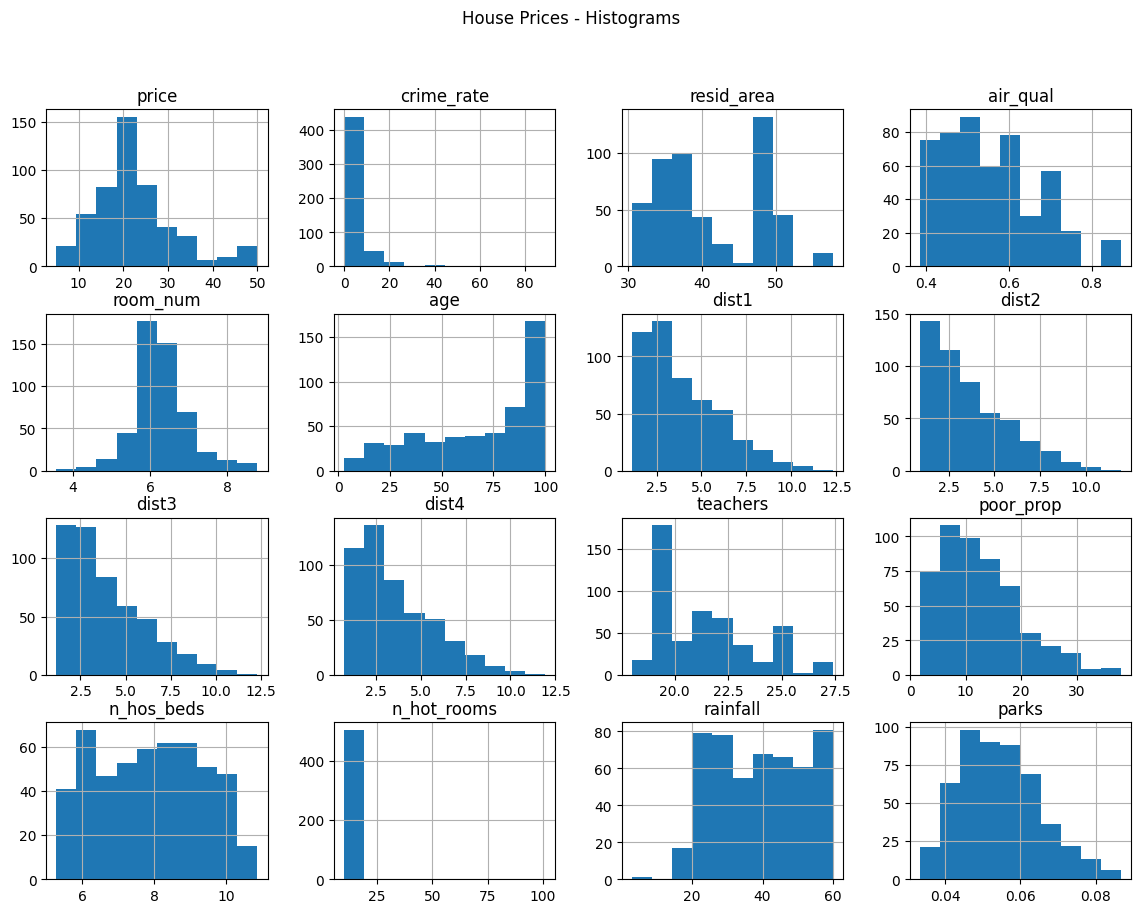

In [43]:
house_prices.hist(figsize=(14, 10))
plt.suptitle("House Prices - Histograms")
plt.show()

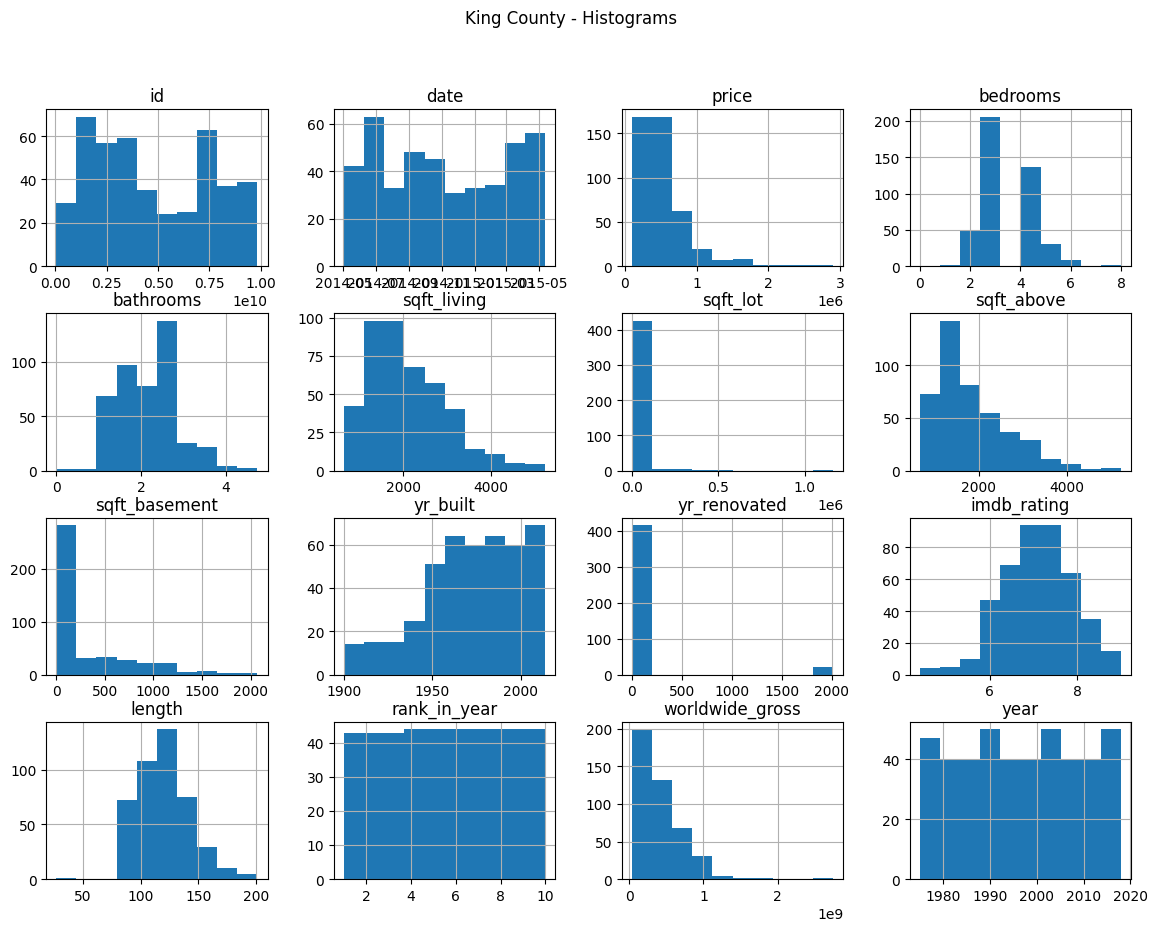

In [44]:
kc_data.hist(figsize=(14, 10))
plt.suptitle("King County - Histograms")
plt.show()

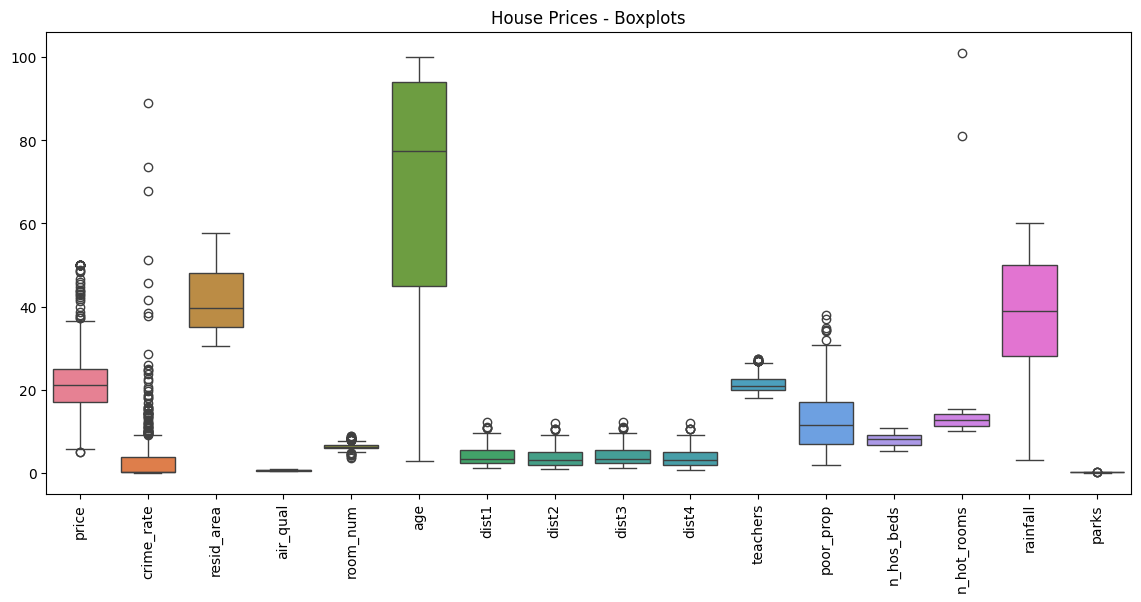

In [45]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=house_prices.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("House Prices - Boxplots")
plt.show()

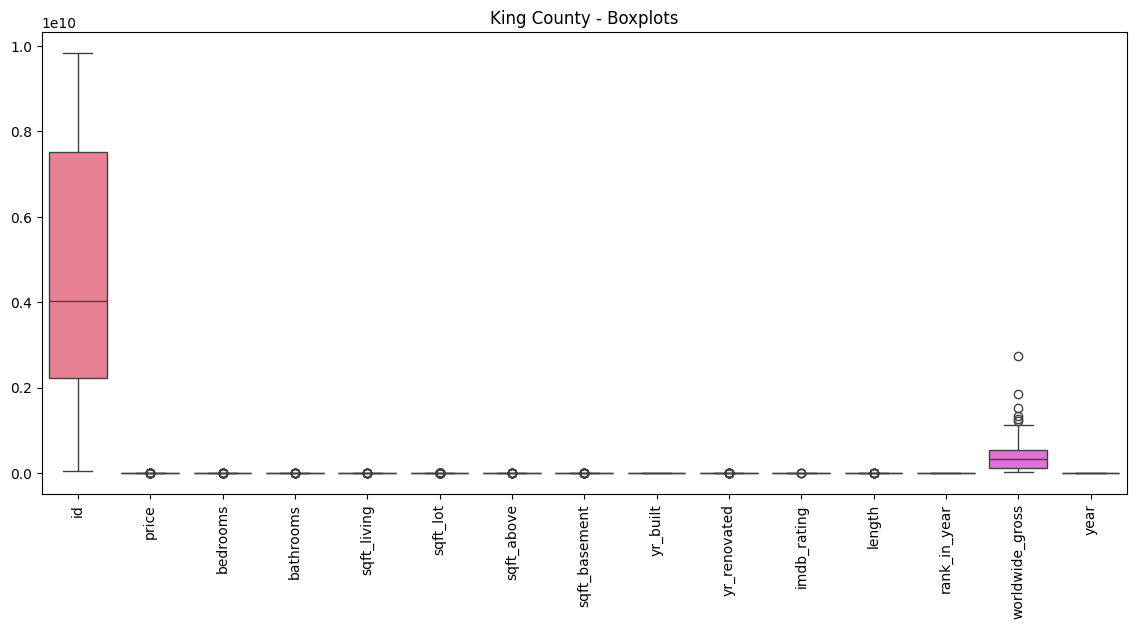

In [46]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=kc_data.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("King County - Boxplots")
plt.show()


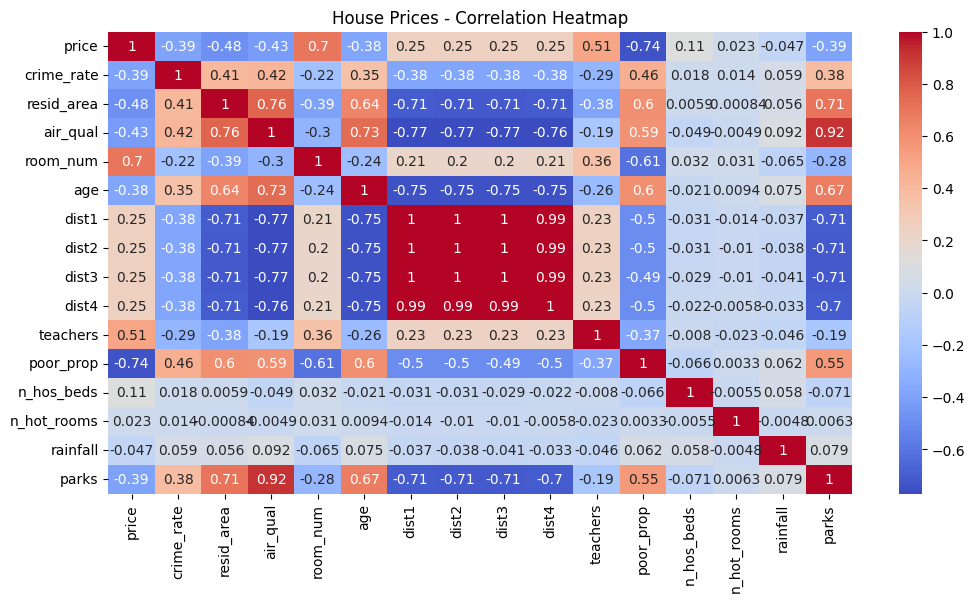

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(house_prices.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("House Prices - Correlation Heatmap")
plt.show()

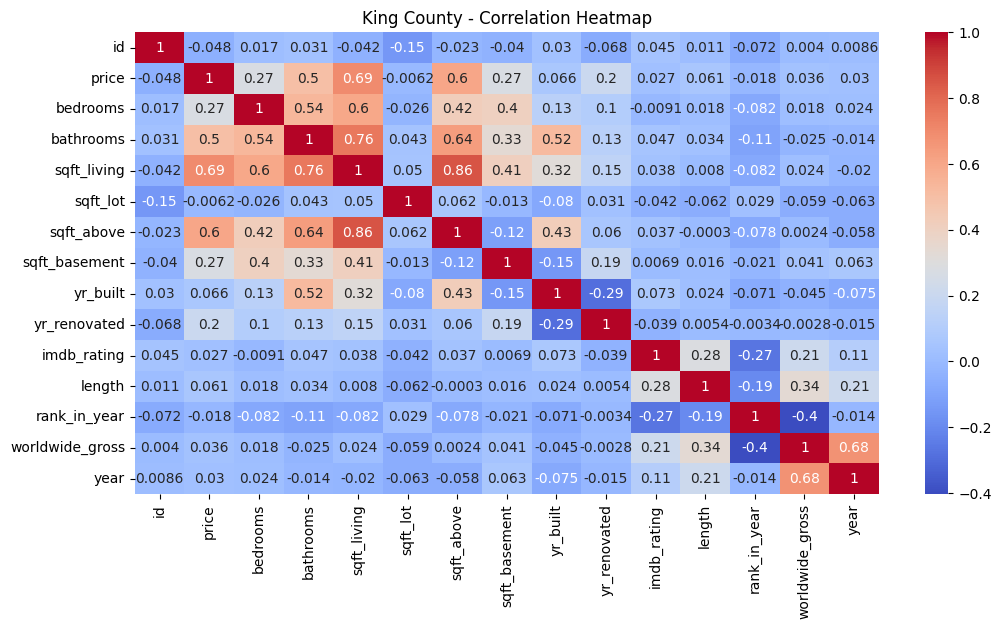

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(kc_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("King County - Correlation Heatmap")
plt.show()

In [49]:
def remove_outliers(df):
    numeric_df = df.select_dtypes(include='number')
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

house_prices_filtered = remove_outliers(house_prices)
kc_data_filtered = remove_outliers(kc_data)

In [52]:
house_prices['price_per_room'] = house_prices['price'] / house_prices['room_num']

In [53]:
features = ['room_num', 'crime_rate', 'air_qual', 'resid_area']
X = house_prices[features]
y = house_prices['price']

In [56]:
kc_data['price_per_sqft'] = kc_data['price'] / kc_data['sqft_living']

In [57]:
features_kc = ['sqft_living', 'bedrooms', 'bathrooms']
X_kc = kc_data[features_kc]
y_kc = kc_data['price']

In [54]:
model = LinearRegression()
model.fit(X, y)

print("\nLinear Regression Results - House Prices:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Linear Regression Results - House Prices:
Coefficients: [ 7.64989144 -0.188446   -7.18721072 -0.15317354]
Intercept: -14.579186876160026


In [60]:
if 'lat' in kc_data.columns and 'long' in kc_data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=kc_data['long'], y=kc_data['lat'], hue=kc_data['price'], palette='coolwarm', alpha=0.6)
    plt.title("King County - House Prices by Location")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("\nGeographic coordinates ('lat' and 'long') not found in the King County dataset.")


Geographic coordinates ('lat' and 'long') not found in the King County dataset.


In [61]:
model_kc = LinearRegression()
model_kc.fit(X_kc, y_kc)

print("\nLinear Regression Results - King County:")
print("Coefficients:", model_kc.coef_)
print("Intercept:", model_kc.intercept_)


Linear Regression Results - King County:
Coefficients: [   329.08558366 -77668.536651    -7908.60687866]
Intercept: 117447.97994933545


In [55]:
print("\nKey Insights - House Prices:")
print("1. Room number and air quality are likely to be positively correlated with price.")
print("2. Crime rate might negatively impact house prices.")
print("3. Feature 'price_per_room' helps in normalized comparison across properties.")
print("4. Outliers removed using IQR method help stabilize regression analysis.")


Key Insights - House Prices:
1. Room number and air quality are likely to be positively correlated with price.
2. Crime rate might negatively impact house prices.
3. Feature 'price_per_room' helps in normalized comparison across properties.
4. Outliers removed using IQR method help stabilize regression analysis.


In [62]:
print("\nKey Insights - King County:")
print("1. Living area and number of bathrooms/bedrooms are important predictors of price.")
print("2. Outliers exist in square footage and price.")
print("3. Price per square foot is useful for comparison across listings.")
print("4. Dataset contains some genre/movie-related features.")


Key Insights - King County:
1. Living area and number of bathrooms/bedrooms are important predictors of price.
2. Outliers exist in square footage and price.
3. Price per square foot is useful for comparison across listings.
4. Dataset contains some genre/movie-related features.
